# I. Introduction

Data is coming from: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans



# 2. Import a Data-Set


In [6]:
cl_file_name = "/content/drive/MyDrive/Data analytics course/Mall_Customers.csv"
cl_df = pd.read_csv(cl_file_name)
cl_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
independant_var = cl_df.iloc[:, [2,4]].values

In [8]:
independant_var

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

#3. Pre-processing. Select Cluster Count

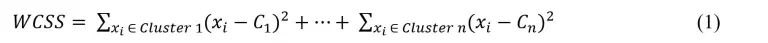

In [11]:
wcss = []

for clusters in range(1, 11):
  kmeans = KMeans(n_clusters=clusters, init="k-means++", random_state=0)
  kmeans.fit(independant_var) #meklē y jeb dependent variable (y nav zināms)
  # print(kmeans.inertia_)
  wcss.append(kmeans.inertia_)

print(wcss)

[171535.5, 75949.15601023017, 45840.67661610867, 28165.58356662934, 23830.24505228459, 19502.407839362204, 15523.684014328752, 13020.084512948222, 11517.231348351697, 10299.698359250398]




---


**Q 27.01**: What number of clusters would be optimal for our case?

In [16]:
x_values = list(range(1, 11))

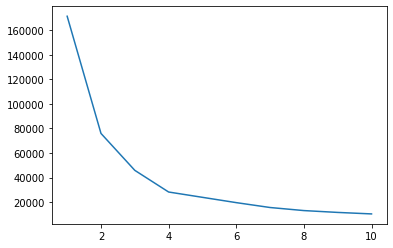

In [17]:
sns.lineplot(x=x_values, y=wcss)

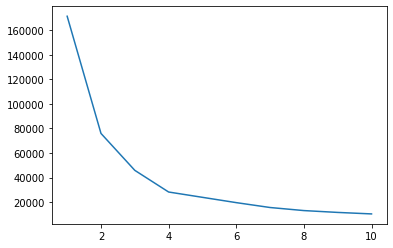

In [18]:
sns.lineplot(x=range(1, 11), y=wcss) #šādi var

In our case optimal number of clusters is **4**.



---



# 5. Training of K-means Model

In [41]:
kmeans_model = KMeans(n_clusters=4, init="k-means++", random_state=0)
clusters_predicted = kmeans_model.fit_predict(independant_var) #klasterizācija fit un predict reizē, nav y jeb dpendent variable, tāpēc

In [42]:
clusters_predicted

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [43]:
res = cl_df.copy()
res["Cluster"] = clusters_predicted # izveido jaunu kolonnu
res

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [44]:
kmeans_model.cluster_centers_

array([[27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [55.70833333, 48.22916667]])

In [ ]:
# sns.scatterplot(data=winequality_df, x='alcohol', y='fixed acidity')



---


**Q 27.02**: Construct scatter-plot with coloring of each cluster

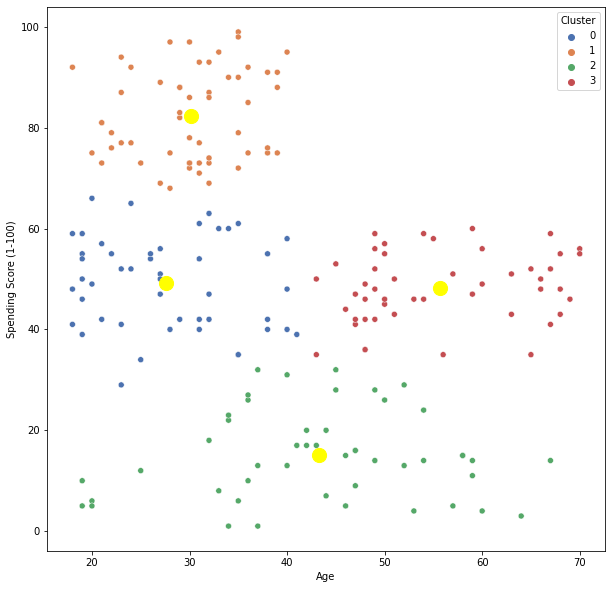

In [45]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=res, x='Age', y='Spending Score (1-100)', hue="Cluster", palette="deep")
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], c="yellow", s=200)



---

